In [5]:
from Assemblies.game import GameField
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [6]:
eps = 0.01
bs = 9/5+eps
L = 200
cp = 50

offp = 19

seeds = np.array([1, 25, 50, 75, 100])

In [7]:
#плотность для конкретного b
def c_density(size, coop_percentage, off_percentage, seed, burnin, evol, b): 
    np.random.seed(seed)
    instance = np.array(np.random.rand(size, size) <= 0.01 * off_percentage, dtype=int) * (-1)
    #здесь active означает места, занятые кооператорами или дефекторами
    active_indexes=(-1-instance).nonzero()
    active_size=active_indexes[0].size
    active = np.array(np.random.rand(active_size) > 0.01 * coop_percentage, dtype=int)
    instance[active_indexes]=np.copy(active)
    density = np.zeros(evol)
    
    game = GameField(size, b)
    game.field = np.copy(instance)
    game.evolveQ(burnin)
    for step in range(evol):
        game.evolveQ(1)
        density[step] = np.count_nonzero(np.equal(game.field,0)) / len(active)
    return density

In [35]:
burnin1= 3000
evol1 = 500

In [36]:
den = np.zeros((len(seeds), evol1))

for i in range(len(seeds)):
    den[i] = c_density(L, cp, offp, seeds[i], burnin1, evol1, bs)
#--------------------------------------------------------------------    
for i in range(len(seeds)):
    line = list(den[i])
    with open('seed' + str(i) + '.txt', 'w', encoding='utf8') as f:
        json.dump(line, f)
    f.close()

In [37]:
copy = np.zeros((len(seeds), evol1))
for i in range(len(seeds)):
    with open('seed' + str(i) + '.txt', 'r', encoding='utf8') as f:
        copy[i] = np.array(json.load(f))
#--------------------------------------------------------------------
avers = np.zeros(len(seeds))

for i in range(len(seeds)):
    avers[i] = np.mean(copy[i], axis=0)
#--------------------------------------------------------------------
n = evol1
errs = np.zeros(len(seeds))

for i in range(len(seeds)):
    errs[i] = np.sqrt(sum((avers[i] - copy[i]) ** 2) / n) / np.sqrt(n)

<ErrorbarContainer object of 3 artists>

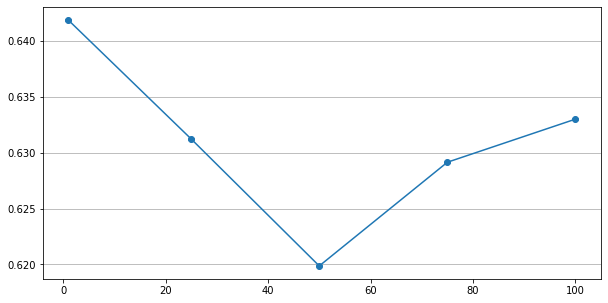

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.grid(b=True,axis='y')

ax.errorbar(seeds, avers, yerr=errs, fmt='o-', capsize=3)

In [39]:
errs

array([5.18030211e-05, 6.97080711e-05, 4.53241682e-05, 4.13712271e-05,
       8.05208206e-05])